In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os

In [2]:
# Create the directory if it doesn't exist
if not os.path.exists('full_analysis'):
    os.makedirs('full_analysis')

In [3]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Cfg-data/final-project/refs/heads/master/usable_notebooks/full_country_data.csv')

# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Display data types and potential inconsistencies
data_types = df.dtypes

missing_values, duplicate_rows, data_types

(Year                                                                                                      0
 Region/Country/Area                                                                                       0
 All staff compensation as % of total expenditure in public institutions (%)                               0
 Basic access to computers by level of education: Lower secondary                                          0
 Basic access to computers by level of education: Primary                                                  0
 Basic access to computers by level of education: Upper secondary                                          0
 Capital expenditure as % of total expenditure in public institutions (%)                                  0
 Current expenditure other than staff compensation as % of total expenditure in public institutions (%)    0
 Gross enrollment ratio - Lower secondary level (female)                                                   0
 Gross enrollment r

In [4]:
# Summary statistics for numerical columns
summary_stats = df.describe()

# Summary statistics for categorical data (Region/Country/Area)
categorical_summary = df['Region/Country/Area'].value_counts()

summary_stats, categorical_summary

(              Year  Region/Country/Area  \
 count   111.000000           111.000000   
 mean   2012.963964           407.018018   
 std       5.549657           237.367302   
 min    2005.000000             8.000000   
 25%    2010.000000           196.000000   
 50%    2015.000000           410.000000   
 75%    2015.000000           620.000000   
 max    2022.000000           840.000000   
 
        All staff compensation as % of total expenditure in public institutions (%)  \
 count                                         111.000000                             
 mean                                           50.770270                             
 std                                            31.625866                             
 min                                             0.000000                             
 25%                                             0.000000                             
 50%                                            65.200000                       

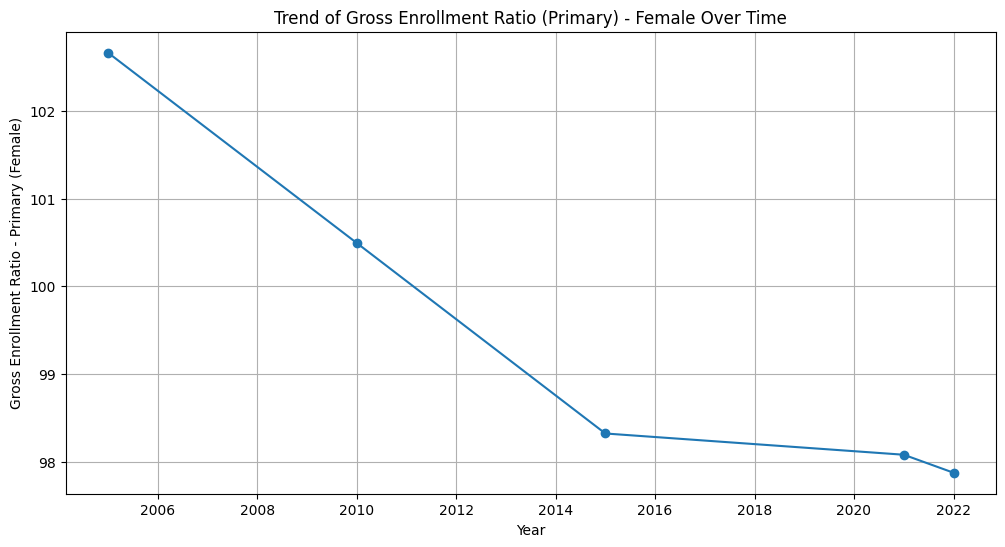

In [5]:
# Set the 'Year' column as the index (if not already)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Example: Plot "Gross enrollment ratio - Primary (female)" over the years
plt.figure(figsize=(12, 6))
plt.plot(df.groupby('Year')['Gross enrollment ratio - Primary (female)'].mean(), marker='o')
plt.title('Trend of Gross Enrollment Ratio (Primary) - Female Over Time')
plt.xlabel('Year')
plt.ylabel('Gross Enrollment Ratio - Primary (Female)')
plt.grid(True)
plt.savefig('full_analysis/trend_enrollment_primary_female.png')  # Save the plot
plt.show()

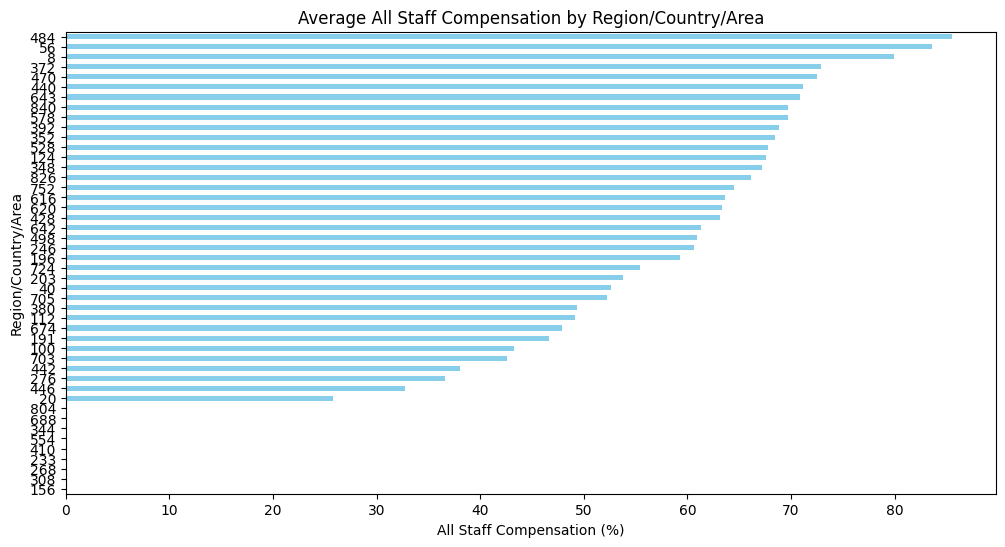

In [6]:
# Group by 'Region/Country/Area' and calculate the mean of 'All staff compensation'
region_staff_compensation = df.groupby('Region/Country/Area')['All staff compensation as % of total expenditure in public institutions (%)'].mean()

# Sort the values
region_staff_compensation = region_staff_compensation.sort_values()

# Plot the result
plt.figure(figsize=(12, 6))
region_staff_compensation.plot(kind='barh', color='skyblue')
plt.title('Average All Staff Compensation by Region/Country/Area')
plt.xlabel('All Staff Compensation (%)')
plt.ylabel('Region/Country/Area')
plt.savefig('full_analysis/region_staff_compensation.png')  # Save the plot
plt.show()

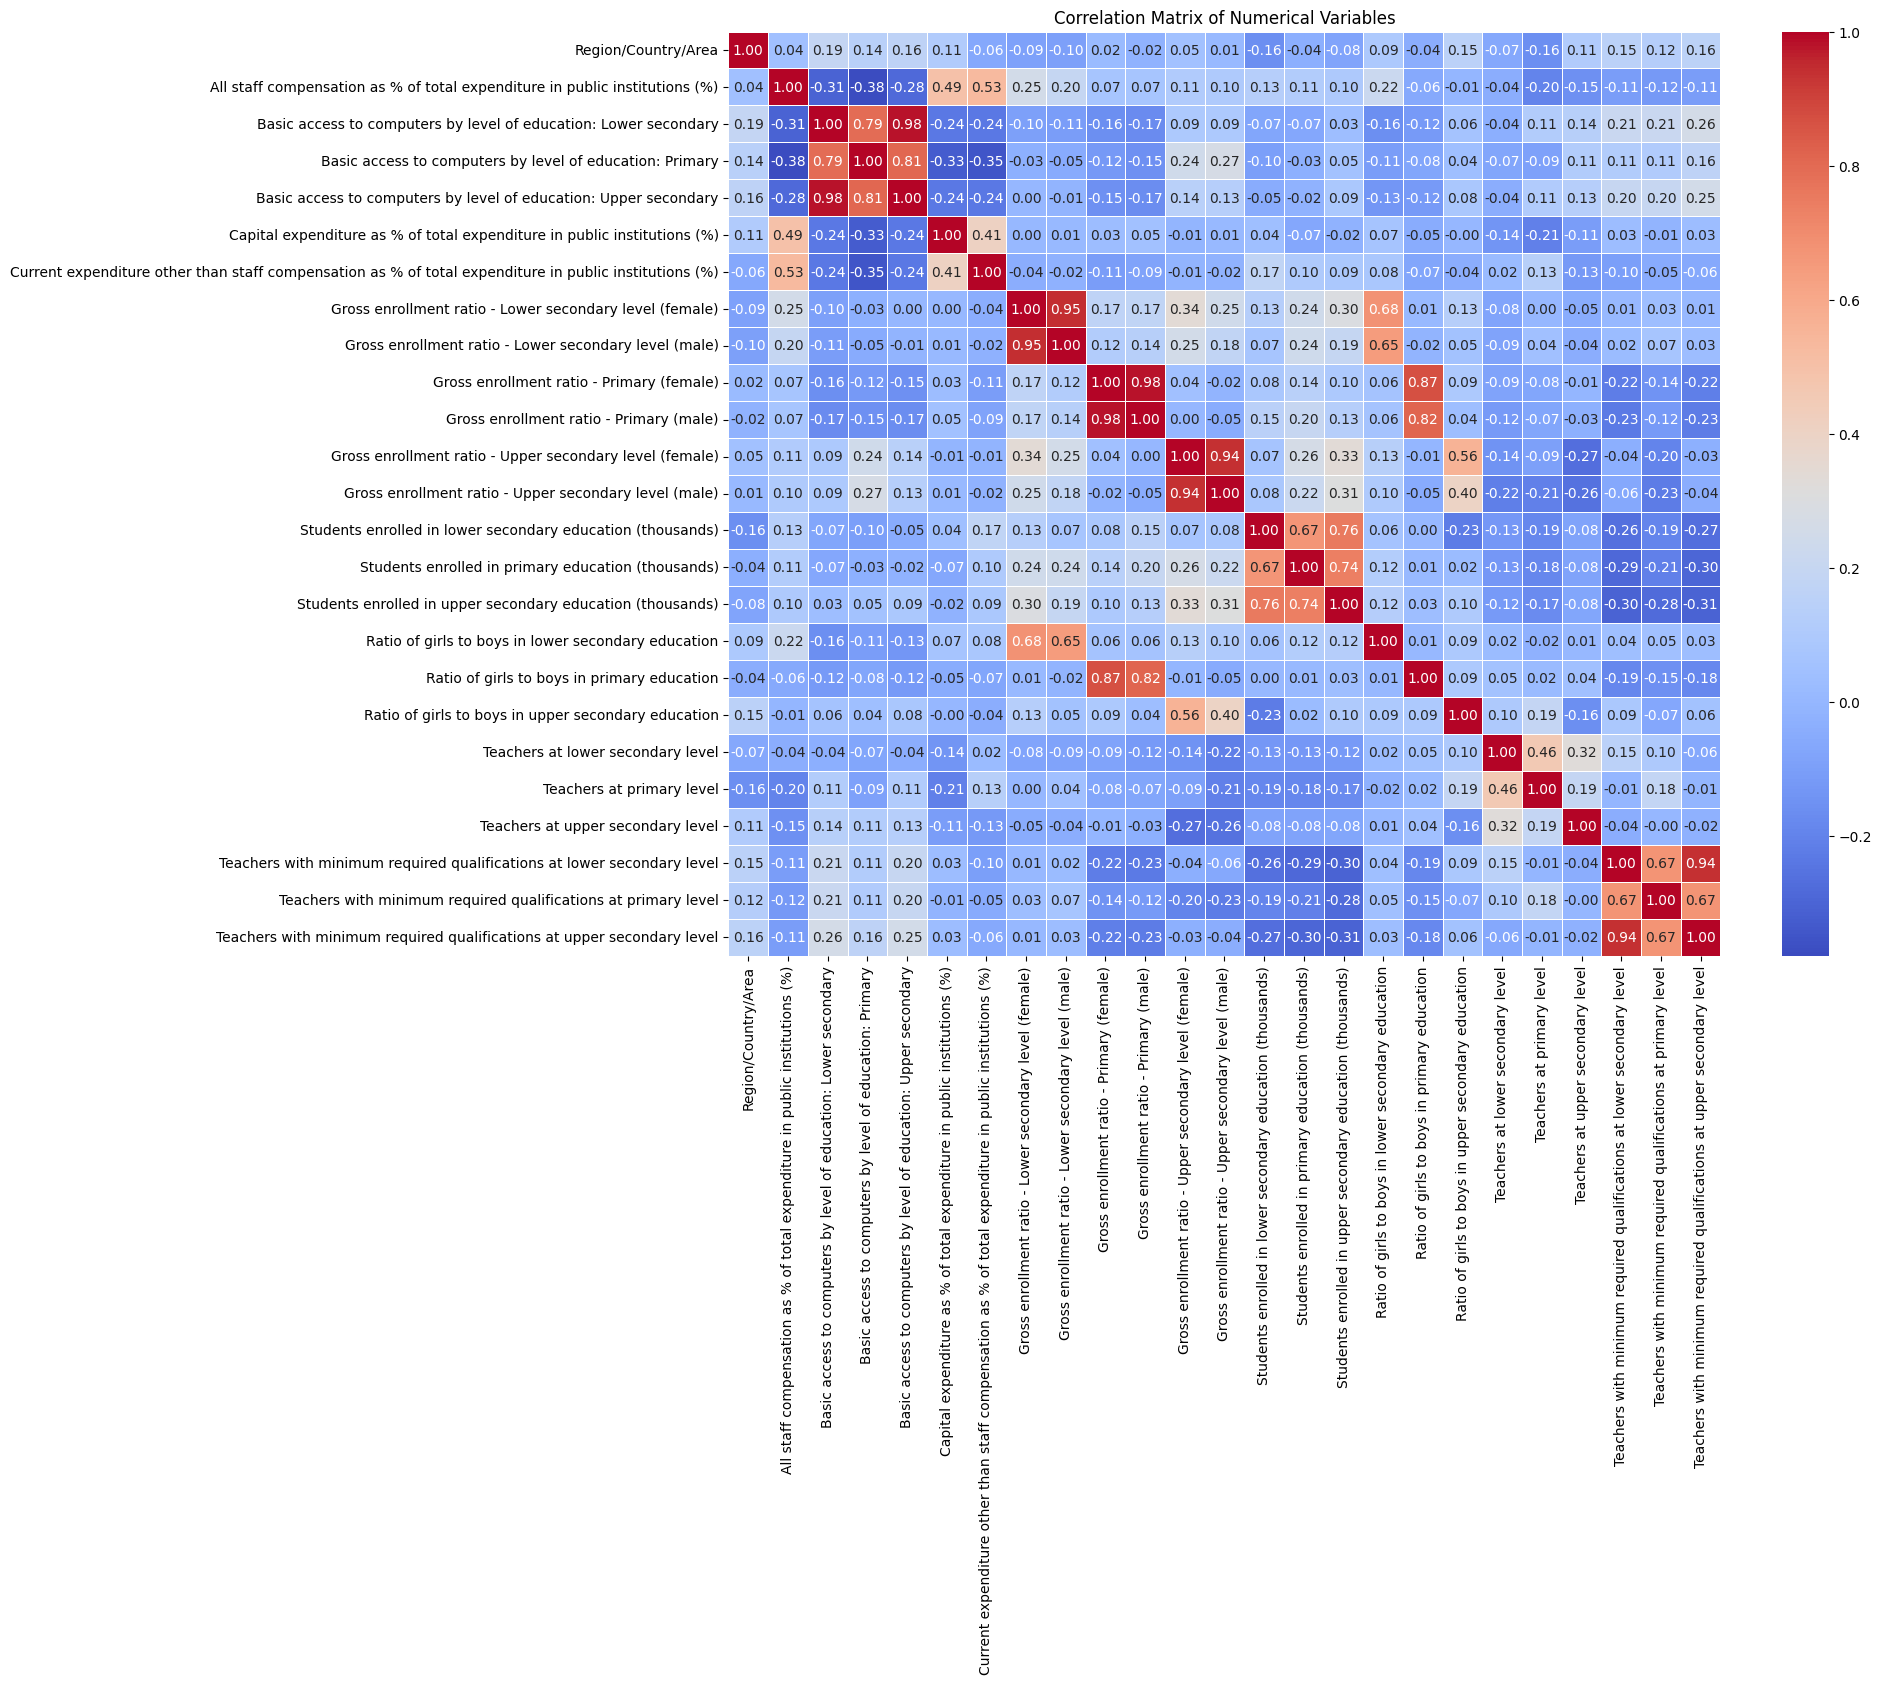

In [15]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.savefig('full_analysis/correlation_matrix.png')  # Save the plot
plt.show()

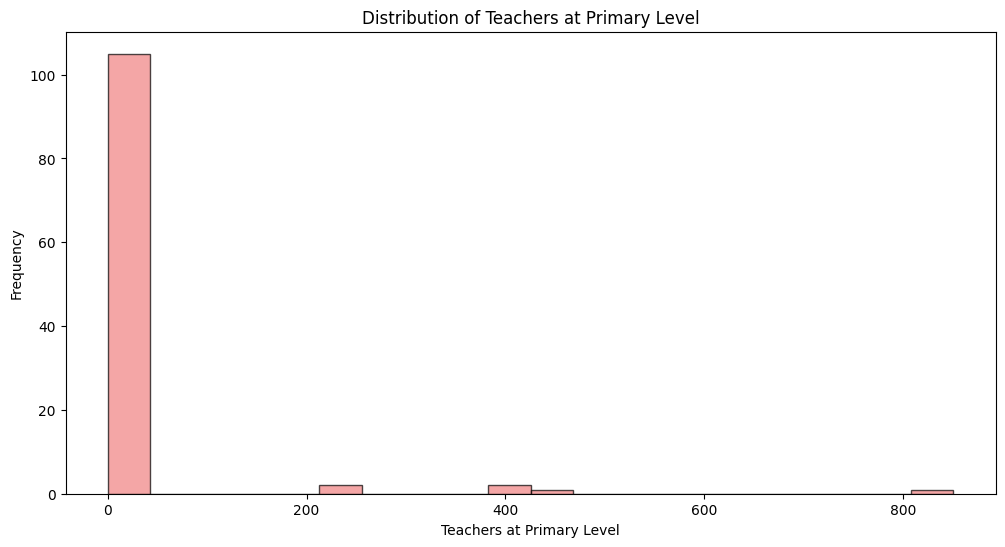

In [8]:
# Plot histogram for "Teachers at primary level"
plt.figure(figsize=(12, 6))
df['Teachers at primary level'].plot(kind='hist', bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Distribution of Teachers at Primary Level')
plt.xlabel('Teachers at Primary Level')
plt.ylabel('Frequency')
plt.savefig('full_analysis/distribution_teachers_primary.png')  # Save the plot
plt.show()

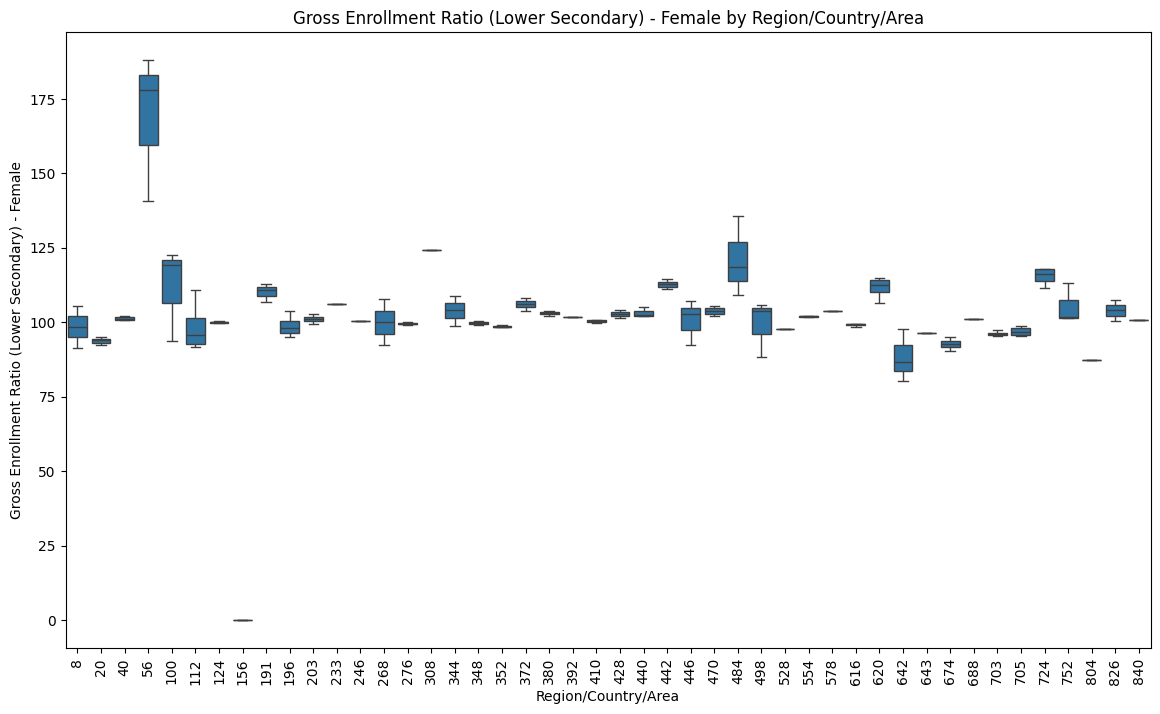

In [9]:
# Boxplot for 'Gross enrollment ratio - Lower secondary level (female)' by region
plt.figure(figsize=(14, 8))
sns.boxplot(x='Region/Country/Area', y='Gross enrollment ratio - Lower secondary level (female)', data=df)
plt.xticks(rotation=90)
plt.title('Gross Enrollment Ratio (Lower Secondary) - Female by Region/Country/Area')
plt.xlabel('Region/Country/Area')
plt.ylabel('Gross Enrollment Ratio (Lower Secondary) - Female')
plt.savefig('full_analysis/boxplot_enrollment_lower_secondary_female.png')  # Save the plot
plt.show()

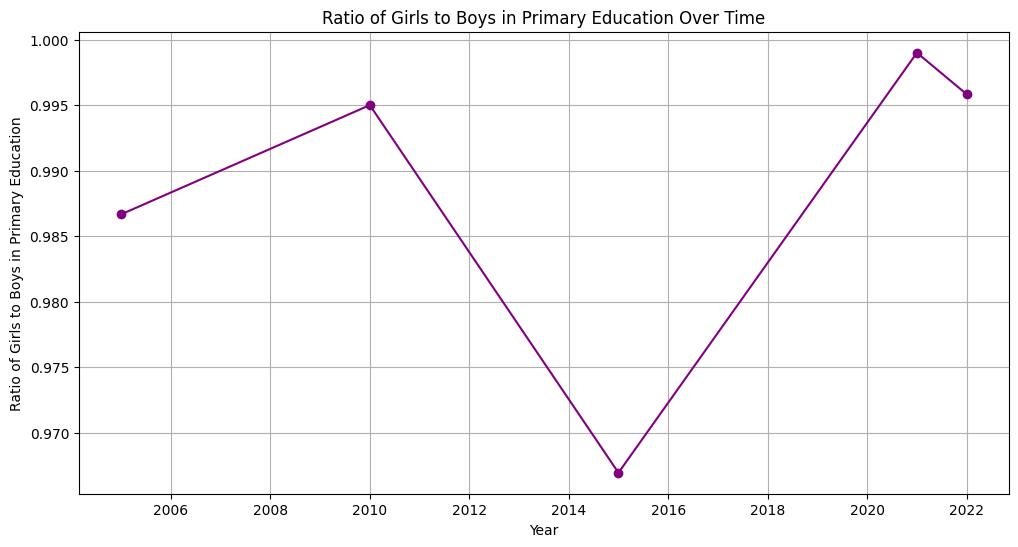

In [10]:
# Line plot for gender ratio in primary education
plt.figure(figsize=(12, 6))
plt.plot(df.groupby('Year')['Ratio of girls to boys in primary education'].mean(), marker='o', color='purple')
plt.title('Ratio of Girls to Boys in Primary Education Over Time')
plt.xlabel('Year')
plt.ylabel('Ratio of Girls to Boys in Primary Education')
plt.grid(True)
plt.savefig('full_analysis/gender_ratio_primary.png')  # Save the plot
plt.show()

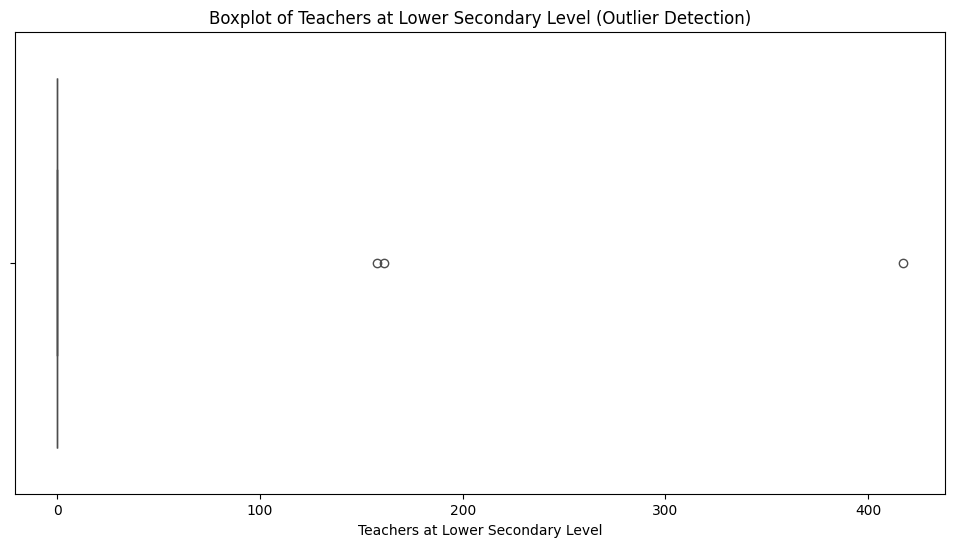

In [11]:
# Boxplot for outlier detection in "Teachers at lower secondary level"
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Teachers at lower secondary level'], color='gold')
plt.title('Boxplot of Teachers at Lower Secondary Level (Outlier Detection)')
plt.xlabel('Teachers at Lower Secondary Level')
plt.savefig('full_analysis/boxplot_teachers_lower_secondary.png')  # Save the plot
plt.show()

In [12]:
# Aggregate the 'Gross enrollment ratio - Lower secondary (female)' by Region and Year
agg_data = df.groupby(['Region/Country/Area', 'Year'])['Gross enrollment ratio - Lower secondary level (female)'].mean().reset_index()

# Display a subset of the aggregated data
agg_data.head()

,Region/Country/Area,Year,Gross enrollment ratio - Lower secondary level (female)
0,8,2015-01-01,105.5
1,8,2022-01-01,91.4
2,20,2010-01-01,95.0
3,20,2015-01-01,92.2
4,20,2022-01-01,94.0


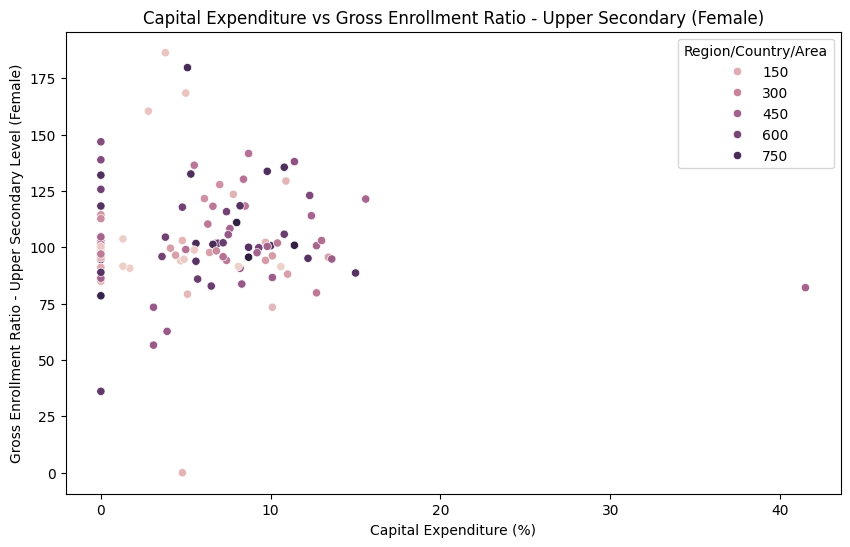

In [13]:
# Scatter plot to compare "Capital expenditure" vs "Gross enrollment ratio - Upper secondary level (female)"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Capital expenditure as % of total expenditure in public institutions (%)',
                y='Gross enrollment ratio - Upper secondary level (female)', data=df, hue='Region/Country/Area')
plt.title('Capital Expenditure vs Gross Enrollment Ratio - Upper Secondary (Female)')
plt.xlabel('Capital Expenditure (%)')
plt.ylabel('Gross Enrollment Ratio - Upper Secondary Level (Female)')
plt.savefig('full_analysis/scatter_capital_vs_enrollment_upper_secondary_female.png')  # Save the plot
plt.show()

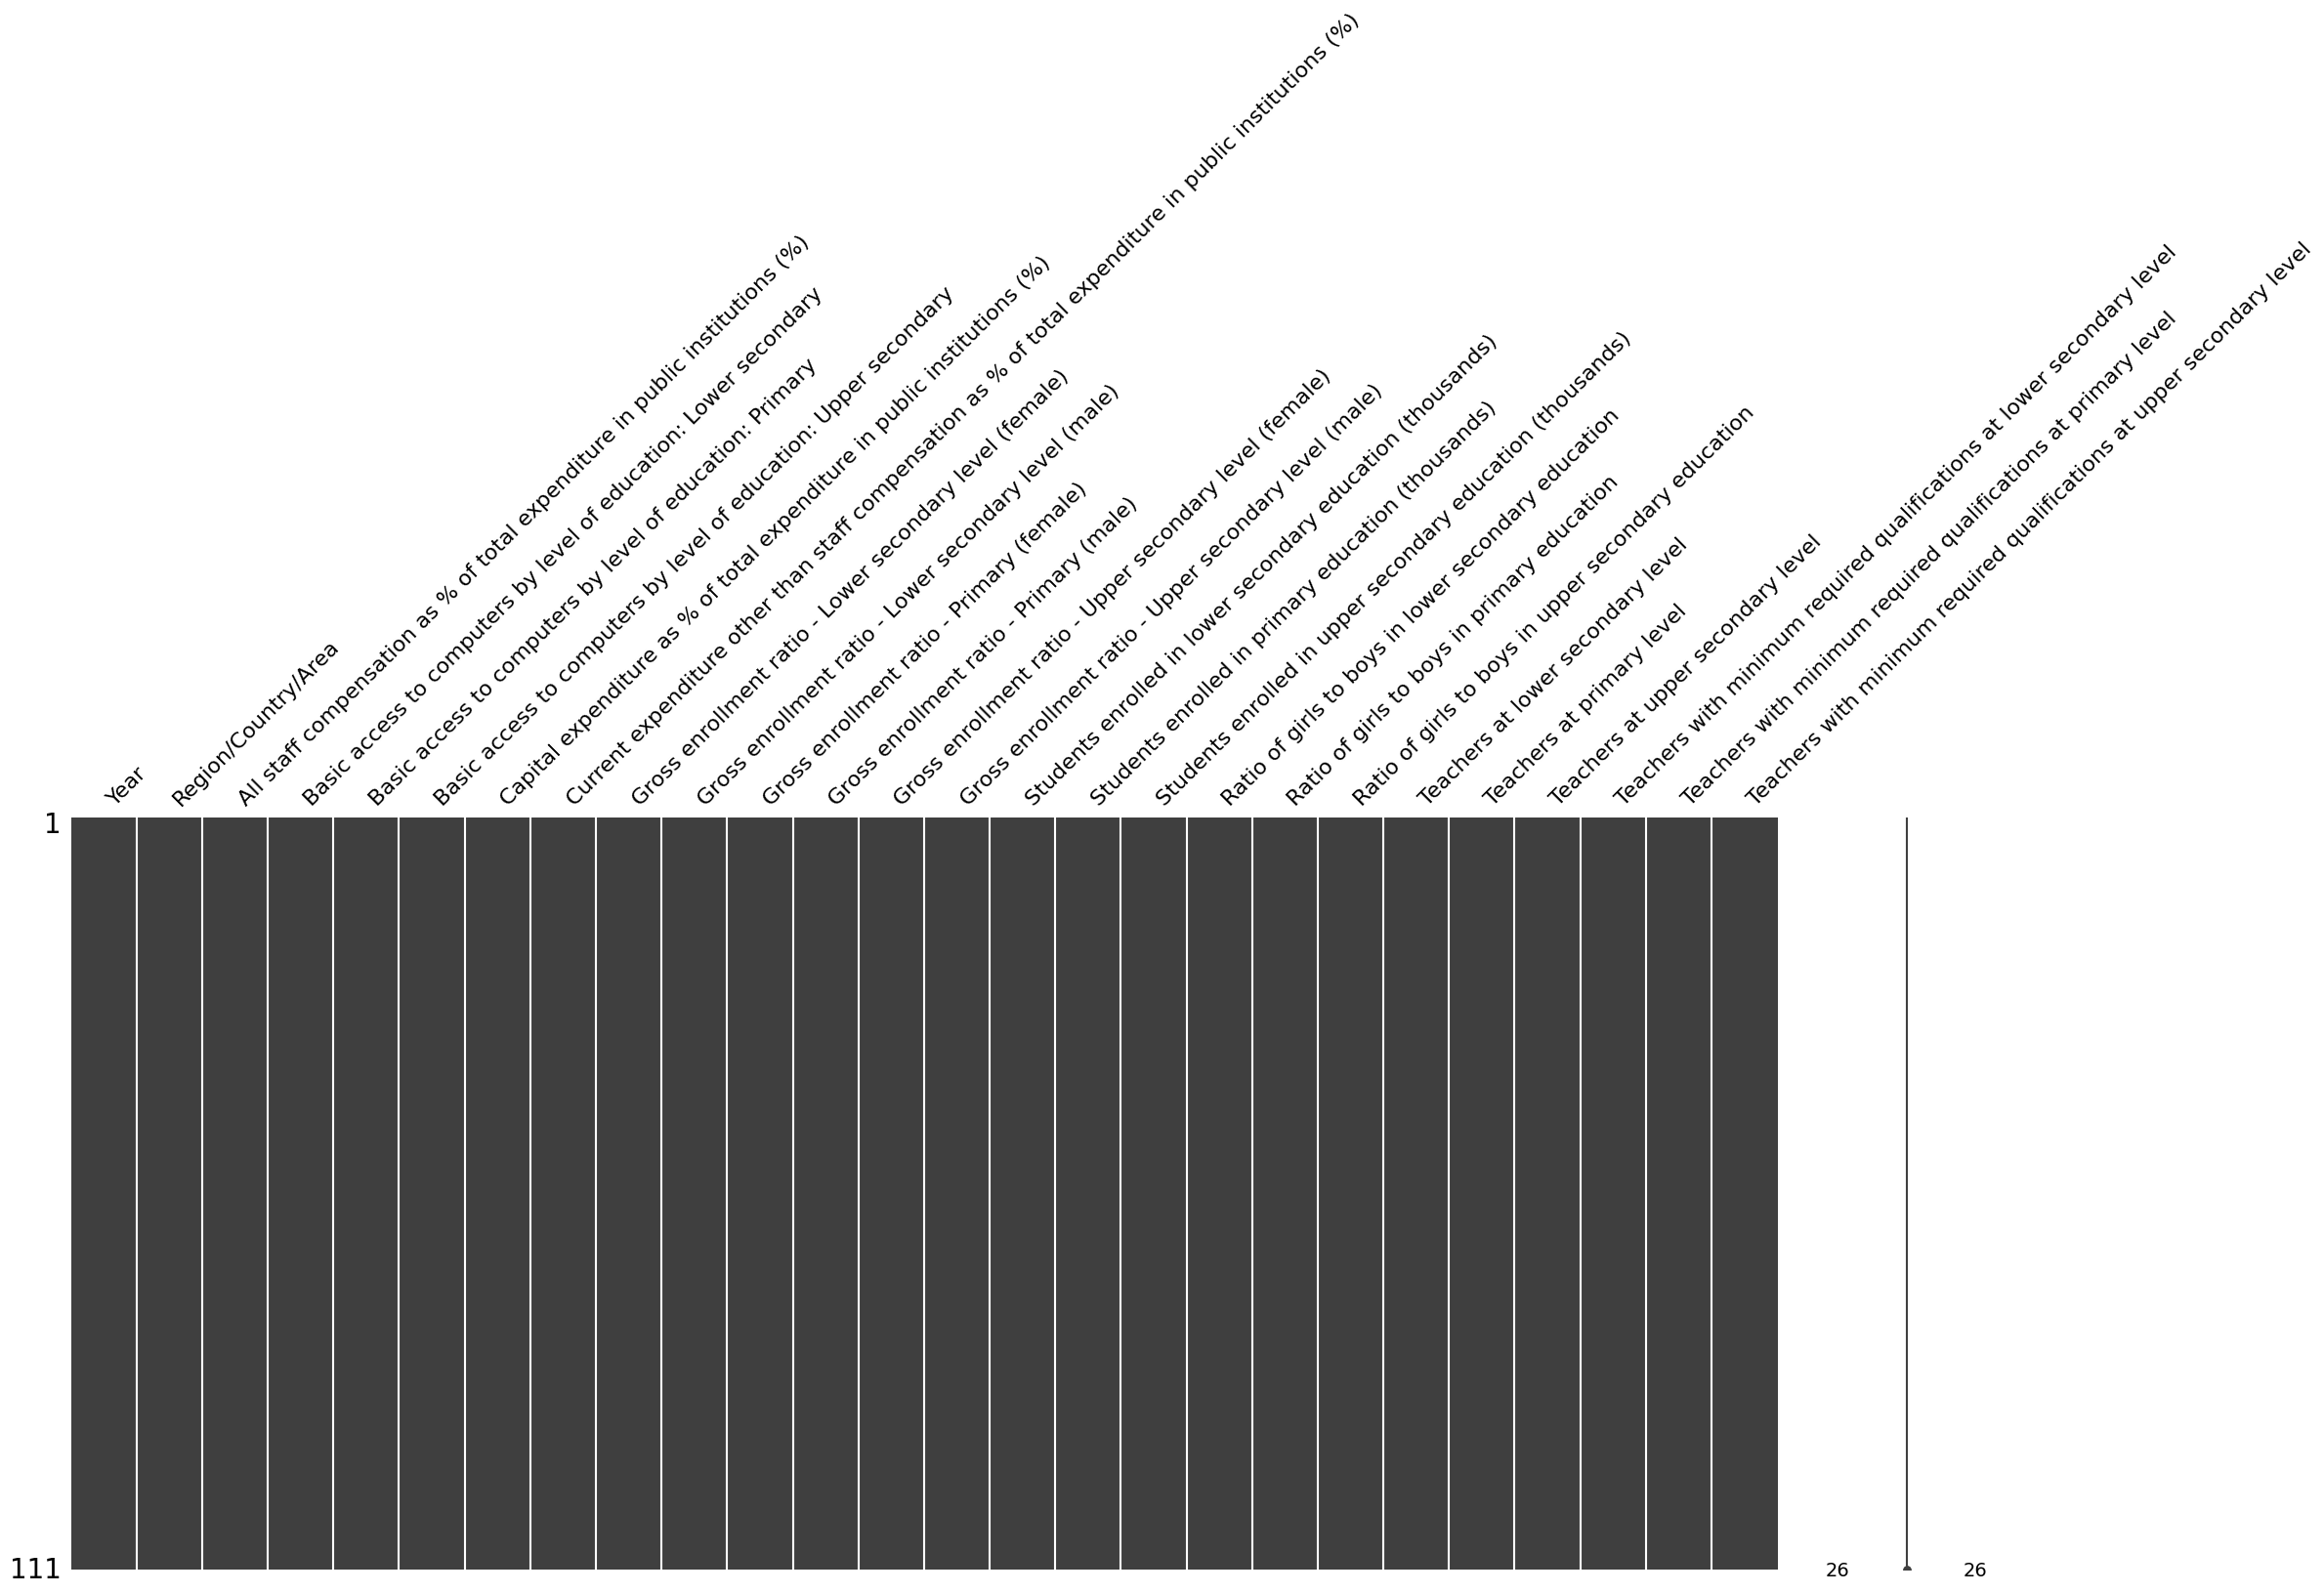

In [14]:
# Visualize missing data
msno.matrix(df)
plt.savefig('full_analysis/missing_data_matrix.png')  # Save the plot
plt.show()